# CRICKET CHIRPS

Ground Cricket Chirps
In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [3]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [4]:
df.shape

(15, 2)

In [5]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


##NO OUTLIERS

In [6]:
df.columns

Index(['Chirps/Second', 'Ground Temperature'], dtype='object')

In [7]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [8]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

EDA

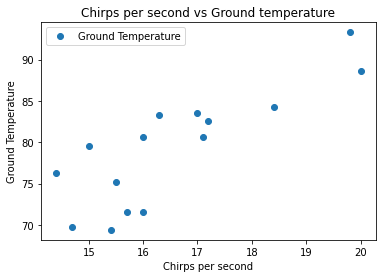

In [9]:
df.plot(x='Chirps/Second', y='Ground Temperature', style = 'o')
plt.title('Chirps per second vs Ground temperature')
plt.xlabel('Chirps per second')
plt.ylabel('Ground Temperature')
plt.show()

1. There is a relationship between the target and feature.
2. There is linear relationship
3. No transformation required

Tasks
1.Find the linear regression equation for this data.
2.Chart the original data and the equation on the chart.
3.Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [10]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


There is a linear relationship.

In [11]:
df['Ground Temperature'].values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [13]:
X = df.loc[:,['Chirps/Second']].values
y = df.loc[:,['Ground Temperature']].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

In [15]:
y_test

array([[69.7],
       [82.6],
       [93.3]])

In [16]:
X_train.shape, X_test.shape

((12, 1), (3, 1))

In [17]:
X_test

array([[14.7],
       [17.2],
       [19.8]])

##MODEL

1.Find the linear regression equation for this data. 

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # y =mx+c
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
#c
print(regressor.intercept_)

[32.97681818]


In [23]:
print(regressor.coef_)

[[2.78901515]]


#predicted ground temperature = 2.78 * (chirps/second) + 32.97

In [24]:
regressor.predict([[20]])

array([[88.75712121]])

2.Chart the original data and the equation on the chart. 

In [23]:
#predicted groundtemp = 2.78 * (chirps/second) + 32.97

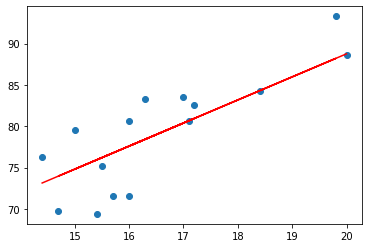

In [25]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color = 'red')
plt.show()

3.Find the equation's 𝑅2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.) 

In [26]:
y_pred = regressor.predict(X_test)
y_pred

array([[73.97534091],
       [80.94787879],
       [88.19931818]])

In [27]:
y_test

array([[69.7],
       [82.6],
       [93.3]])

In [28]:
y_pred

array([[73.97534091],
       [80.94787879],
       [88.19931818]])

In [29]:
from sklearn import metrics
print('R2_SCORE is', metrics.r2_score(y_test, y_pred))

R2_SCORE is 0.8316246172433902


Since the r2 score is 0.83 the equation is good fit for this data.

4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [30]:
import math
#predicted_ground_temp = 2.78 * (chirps/second) + 32.97
predicted_ground_temp = 95
chirps_second = (95 / 2.78) - 32.97
chirps_second

1.2026618705035972

5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [31]:
regressor.predict([[18]])

array([[83.17909091]])